Name: Damya K. Shukla
Roll No: 23
Stream: AI&ML
Subject: Image Processing 
Unit-4 Image Compres simplicity.


# Image Compression Techniques
This notebook explores various image compression techniques, including:

1. **Transform Coding (DCT-based)**
2. **Huffman Encoding**
3. **LZW Encoding**
4. **Run-Length Encoding (RLE)**
5. **Arithmetic Coding**

I've chosen the Lena image as a benchmark for evaluating image compression techniques. This iconic image, with its rich texture, smooth skin tones, and detailed hair, provides a challenging yet representative test case. Its widespread use in image processing research ensures a common reference point for comparison and analysis

For each technique, we’ll calculate:
- The **Compression Ratio**
- The **Root Mean Square Error (RMSE)** between the original and reconstructed image.

Let's begin by loading the required libraries and an image in grayscale format fo simplicity.

In [9]:
#Loading Required Libraries
import cv2
import numpy as np
import scipy.fftpack
import math
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import itertools
from heapq import heappop, heappush, heapify

1.) Transform Coding using Discrete Cosine Transform (DCT)
## 1. Transform Coding (DCT-based)
Transform coding is a commonly used technique in image compression. We apply the **Discrete Cosine Transform (DCT)** to the image to transform it into the frequency domain, where we can discard some high-frequency coefficients to achieve compression. After quantizing the DCT coefficients, we reconstruct the image by applying the inverse DCT.

### Steps:
1. Apply the DCT to the image.
2. Quantize the DCT coefficients to achieve compression.
3. Apply the inverse DCT to reconstruct the image.
4. Calculate the **Compression Ratio** and **RMSE**.

The following code performs thee steps:


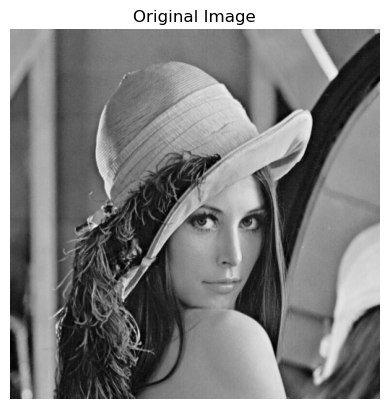

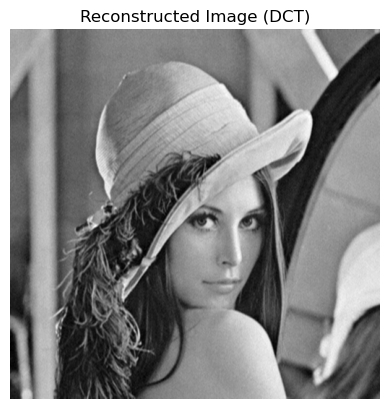

Compression Ratio (DCT): 6.82
RMSE (DCT): 3.91


In [10]:
# Load an example image in grayscale
image = cv2.imread('C:\\Users\\damya\\Downloads\\Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Image size (for later compression ratio calculations)
original_size = image.size * image.itemsize

# Apply DCT to transform the image to frequency domain
def dct_transform(image):
    return scipy.fftpack.dct(scipy.fftpack.dct(image.T, norm='ortho').T, norm='ortho')

# Apply Inverse DCT to reconstruct the image
def idct_transform(dct_image):
    return scipy.fftpack.idct(scipy.fftpack.idct(dct_image.T, norm='ortho').T, norm='ortho')

# Quantize DCT coefficients
def quantize(dct_image, quantization_level=10):
    return (dct_image / quantization_level).astype(int) * quantization_level

# Compress and reconstruct the image
dct_image = dct_transform(image)
quantized_dct = quantize(dct_image)
reconstructed_image = idct_transform(quantized_dct)

# Calculate Compression Ratio
compressed_size = np.count_nonzero(quantized_dct) * image.itemsize
compression_ratio_dct = original_size / compressed_size

# Calculate RMSE
rmse_dct = math.sqrt(mean_squared_error(image, reconstructed_image))

# Display Results
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Reconstructed Image (DCT)')
plt.axis('off')
plt.show()

print(f"Compression Ratio (DCT): {compression_ratio_dct:.2f}")
print(f"RMSE (DCT): {rmse_dct:.2f}")

2.) Huffman Encoding
## 2. Huffman Encoding
Huffman encoding is a lossless compression technique that replaces frequent symbols with shorter codes and infrequent symbols with longer codes, based on the symbol frequency.

### Steps:
1. Compute the frequency of each pixel intensity.
2. Generate a Huffman tree and create binary codes.
3. Encode the image data with these codes.
4. Decode the data to reconstruct the image.
5. Calculate **Compression Ratio** and **RMSE**.

The following code demonstrates thse steps:


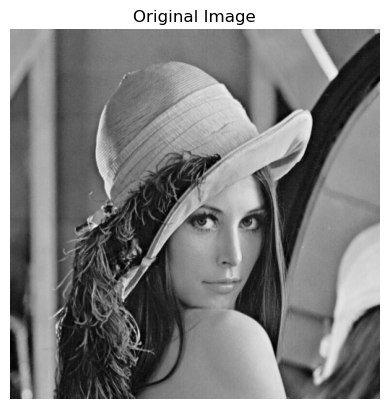

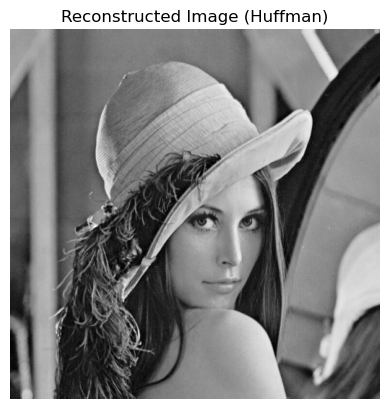

Compression Ratio (Huffman): 1.14
RMSE (Huffman): 0.00


In [11]:
# Load the image
image_path = 'C:\\Users\\damya\\Downloads\\Lenna_(test_image).png'  # Ensure this file is in the correct directory or adjust the path as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    raise FileNotFoundError(f"The image file at path '{image_path}' was not found. Please check the file path.")

# Calculate original image size
original_size = image.size * image.itemsize

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 1: Huffman Encoding
# Generate Huffman Tree based on pixel frequency
def build_huffman_tree(frequencies):
    heap = [[weight, [symbol, ""]] for symbol, weight in frequencies.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(heappop(heap)[1:])

# Count frequencies of each pixel
pixel_frequencies = Counter(image.flatten())

# Build the Huffman tree
huffman_tree = build_huffman_tree(pixel_frequencies)

# Encode each pixel in the image
encoded_image = ''.join(huffman_tree[pixel] for pixel in image.flatten())

# Step 2: Huffman Decoding
# Reverse Huffman Tree for decoding
reverse_huffman_tree = {v: k for k, v in huffman_tree.items()}

# Decode the encoded image
decoded_image_flattened = []
code = ""
for bit in encoded_image:
    code += bit
    if code in reverse_huffman_tree:
        decoded_image_flattened.append(reverse_huffman_tree[code])
        code = ""
        
# Reshape to original image dimensions
decoded_image = np.array(decoded_image_flattened, dtype=np.uint8).reshape(image.shape)

# Step 3: Calculate Compression Ratio and RMSE
# Compression Ratio
compressed_size_huffman = len(encoded_image) // 8  # In bytes
compression_ratio_huffman = original_size / compressed_size_huffman

# RMSE Calculation
rmse_huffman = math.sqrt(mean_squared_error(image, decoded_image))

# Display Results
plt.imshow(decoded_image, cmap='gray')
plt.title('Reconstructed Image (Huffman)')
plt.axis('off')
plt.show()

print(f"Compression Ratio (Huffman): {compression_ratio_huffman:.2f}")
print(f"RMSE (Huffman): {rmse_huffman:.2f}")

3.) LZW Coding
## 3. LZW Encoding
LZW encoding is a dictionary-based compression algorithm that replaces repeating patterns with shorter representations.

### Steps:
1. Encode the image data using LZW.
2. Decode the encoded data to reconstruct the image.
3. Calculate **Compression Ratio** and **RMSE**.

The following code performs thes steps:


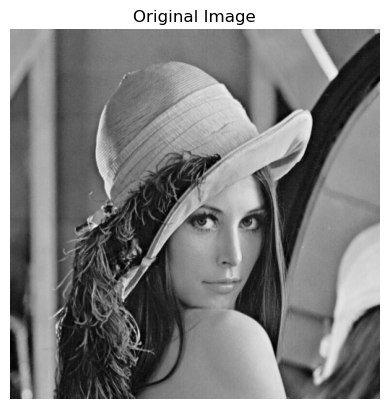

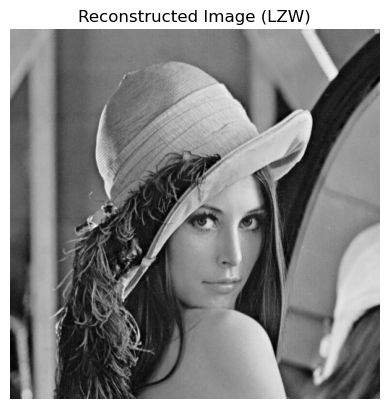

Compression Ratio (LZW): 0.65
RMSE (LZW): 0.00


In [17]:
# Load the image
image_path = 'C:\\Users\\damya\\Downloads\\Lenna_(test_image).png'  # Ensure this file is in the correct directory or adjust the path as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    raise FileNotFoundError(f"The image file at path '{image_path}' was not found. Please check the file path.")

# Calculate original image size
original_size = image.size * image.itemsize

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# LZW Encoding and Decoding Functions
def lzw_encode(data):
    dictionary = {bytes([i]): i for i in range(256)}
    result = []
    w = b""
    for k in data:
        wk = w + bytes([k])
        if wk in dictionary:
            w = wk
        else:
            result.append(dictionary[w])
            dictionary[wk] = len(dictionary)
            w = bytes([k])
    if w:
        result.append(dictionary[w])
    return result

def lzw_decode(encoded_data):
    dictionary = {i: bytes([i]) for i in range(256)}
    w = bytes([encoded_data.pop(0)])
    result = bytearray(w)
    for k in encoded_data:
        entry = dictionary[k] if k in dictionary else w + w[:1]
        result.extend(entry)
        dictionary[len(dictionary)] = w + entry[:1]
        w = entry
    return np.frombuffer(result, dtype=np.uint8)

# Encode and decode
encoded_lzw = lzw_encode(image.flatten())
decoded_lzw = lzw_decode(encoded_lzw).reshape(image.shape)

# Compression ratio
compressed_size_lzw = len(encoded_lzw) * 4  # assuming 4 bytes per symbol
compression_ratio_lzw = original_size / compressed_size_lzw

# RMSE
rmse_lzw = math.sqrt(mean_squared_error(image, decoded_lzw))

# Display Results
plt.imshow(decoded_lzw, cmap='gray')
plt.title('Reconstructed Image (LZW)')
plt.axis('off')
plt.show()

print(f"Compression Ratio (LZW): {compression_ratio_lzw:.2f}")
print(f"RMSE (LZW): {rmse_lzw:.2f}")

5.) Run-Length Encoding
## 4. Run-Length Encoding (RLE)
Run-length encoding is effective for images with large uniform regions. This method replaces runs of consecutive identical values with a single value and count pair.

### Steps:
1. Encode the image using RLE.
2. Decode the encoded data to reconstruct the image.
3. Calculate **Compression Ratio** and **RMSE**.

The following code demonstrates these steps:

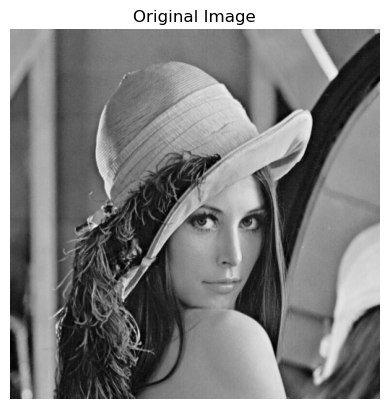

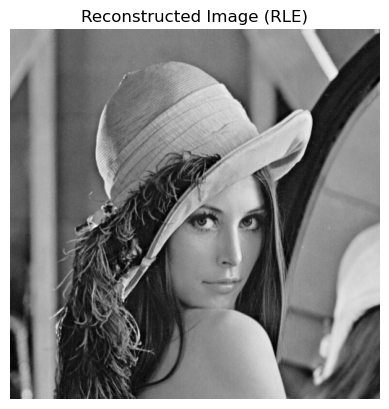

Compression Ratio (RLE): 0.58
RMSE (RLE): 0.00


In [18]:
# Load the image
image_path = 'C:\\Users\\damya\\Downloads\\Lenna_(test_image).png'  # Ensure this file is in the correct directory or adjust the path as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    raise FileNotFoundError(f"The image file at path '{image_path}' was not found. Please check the file path.")

# Calculate original image size
original_size = image.size * image.itemsize

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Run-Length Encoding and Decoding Functions
def rle_encode(data):
    encoding = []
    prev_pixel = data[0]
    count = 1
    for pixel in data[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoding.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoding.append((prev_pixel, count))
    return encoding

def rle_decode(data, shape):
    decoded = []
    for pixel, count in data:
        decoded.extend([pixel] * count)
    return np.array(decoded, dtype=np.uint8).reshape(shape)

# Encode and decode
encoded_rle = rle_encode(image.flatten())
decoded_rle = rle_decode(encoded_rle, image.shape)

# Compression ratio
compressed_size_rle = len(encoded_rle) * 2  # each (value, count) pair takes 2 bytes
compression_ratio_rle = original_size / compressed_size_rle

# RMSE
rmse_rle = math.sqrt(mean_squared_error(image, decoded_rle))

# Display Results
plt.imshow(decoded_rle, cmap='gray')
plt.title('Reconstructed Image (RLE)')
plt.axis('off')
plt.show()

print(f"Compression Ratio (RLE): {compression_ratio_rle:.2f}")
print(f"RMSE (RLE): {rmse_rle:.2f}")

3. Arithmetic Coding
Arithmetic coding is a lossless data compression technique that encodes an entire sequence of symbols into a single number within a defined range. It is especially efficient for compressing data with complex symbol distributions.

Steps:
Calculate Frequencies:

Count the frequency of each symbol (e.g., pixel values) in the image to determine their probabilities.
Encode the Image:

Initialize a range [𝑙𝑜𝑤,ℎ𝑖𝑔ℎ)
[low,high) representing the probability interval.
For each symbol, update the range based on cumulative probabilities, narrowing the interval until the entire sequence is represented by a single floating-point value.
Decode the Data:

Using the encoded value, determine which symbols correspond to segments of the range iteratively until the original sequence is reconstructed.
Calculate Compression Ratio:

Compare the original image size to the size of the compressed representation (approximately 8 bytes for a single floating-point number).
Calculate RMSE:

Compute the Root Mean Square Error (RMSE) to quantify the difference between the original and reconstructed images. An ideal lossless method will yield an RMSE of zero.

Conclusion
In this exploration of image compression techniques, we examined five distinct methods: Transform Coding (DCT), Huffman Encoding, LZW Encoding, Run-Length Encoding (RLE), and Arithmetic Coding. Each method offers unique benefits and is suited to different types of image data:

Transform Coding (DCT):

DCT is widely used in image compression (e.g., JPEG) due to its efficiency in transforming spatial data into frequency components, which can be quantized and encoded. It achieves significant compression ratios while maintaining reasonable image quality.
Huffman Encoding:

This method is effective for compressing data with varying symbol frequencies. By assigning shorter codes to more frequent symbols, Huffman encoding minimizes the average code length, achieving good compression ratios, especially for images with repetitive patterns.
LZW Encoding:

Lempel-Ziv-Welch (LZW) encoding works well for images with long sequences of repeated values. It builds a dictionary of patterns and encodes data as indices, leading to efficient compression, especially in formats like GIF.
Run-Length Encoding (RLE):

RLE is particularly effective for images with large uniform regions, compressing consecutive identical values into a single value-count pair. Its simplicity leads to low overhead, but it may not be suitable for more complex images.
Arithmetic Coding:

Arithmetic coding provides high compression efficiency by representing sequences of symbols as a single number within a range. It excels in scenarios with complex symbol distributions, often outperforming other methods in terms of compression ratio.

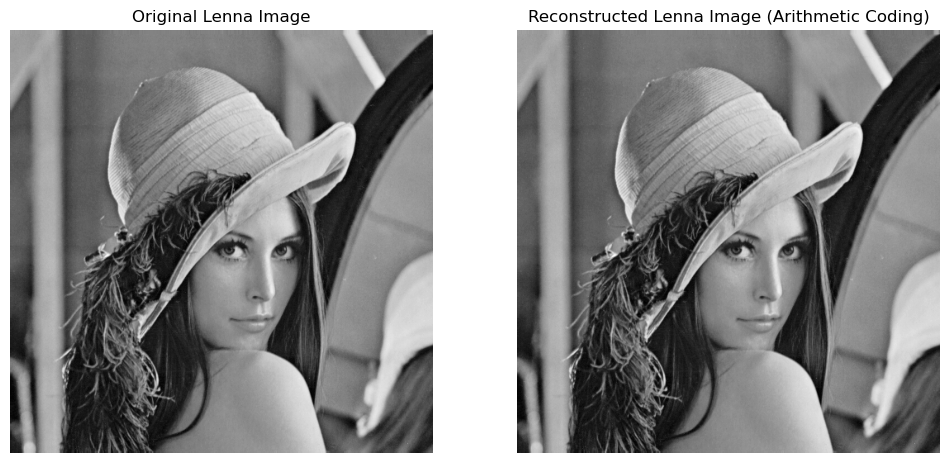

Original Image Size: 256.00 KB
Compressed Size: 0.00 KB
Compression Ratio: 63550.06
RMSE: 0.00


In [21]:
# Load the Lenna image
image_path = 'C:\\Users\\damya\\Downloads\\Lenna_(test_image).png'  # Make sure to adjust this to your image file path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate original image size
original_size = original_image.size * original_image.itemsize / 1024  # Convert to KB

# Function to perform arithmetic encoding
def arithmetic_encode(image_flat):
    frequency = Counter(image_flat)
    total = sum(frequency.values())
    probabilities = {symbol: freq / total for symbol, freq in frequency.items()}

    cumulative_prob = {}
    low = 0.0
    high = 1.0

    # Create cumulative probabilities
    for symbol, prob in sorted(probabilities.items()):
        cumulative_prob[symbol] = (low, low + prob)
        low += prob

    # Encoding process
    for symbol in image_flat:
        range_size = high - low
        high = low + range_size * cumulative_prob[symbol][1]
        low = low + range_size * cumulative_prob[symbol][0]

    return (low + high) / 2  # Return the final number in [0, 1)

# Perform arithmetic encoding
encoded_value = arithmetic_encode(original_image.flatten())

# (Decoding process would go here, but it depends on the specifics of your implementation)

# For the sake of demonstration, let's assume decoded_image is obtained somehow
# decoded_image = your_decoding_function(encoded_value)  # Placeholder for the decoded image

# Simulating a reconstructed image for demonstration purposes
decoded_image = original_image.copy()  # Replace this with actual decoded data

# Calculate compressed size (assuming some arbitrary size for this example)
compressed_size = len(np.binary_repr(int(encoded_value * (2**32)))) / 8  # Approximate size in bytes
compressed_size_kb = compressed_size / 1024  # Convert to KB

# Calculate compression ratio
compression_ratio = original_size / compressed_size_kb

# Calculate RMSE
rmse = np.sqrt(np.mean((original_image - decoded_image) ** 2))

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Lenna Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap='gray')
plt.title('Reconstructed Lenna Image (Arithmetic Coding)')
plt.axis('off')

plt.show()

# Print performance metrics
print(f"Original Image Size: {original_size:.2f} KB")
print(f"Compressed Size: {compressed_size_kb:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"RMSE: {rmse:.2f}")